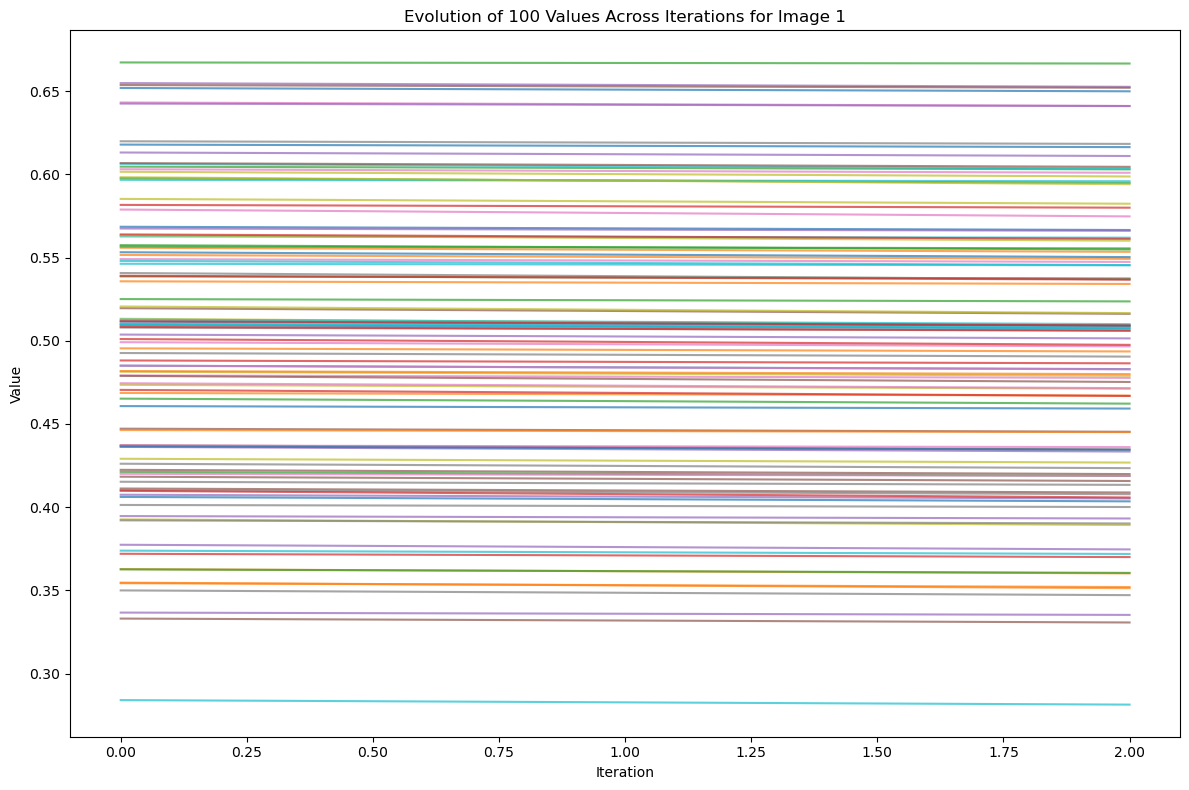

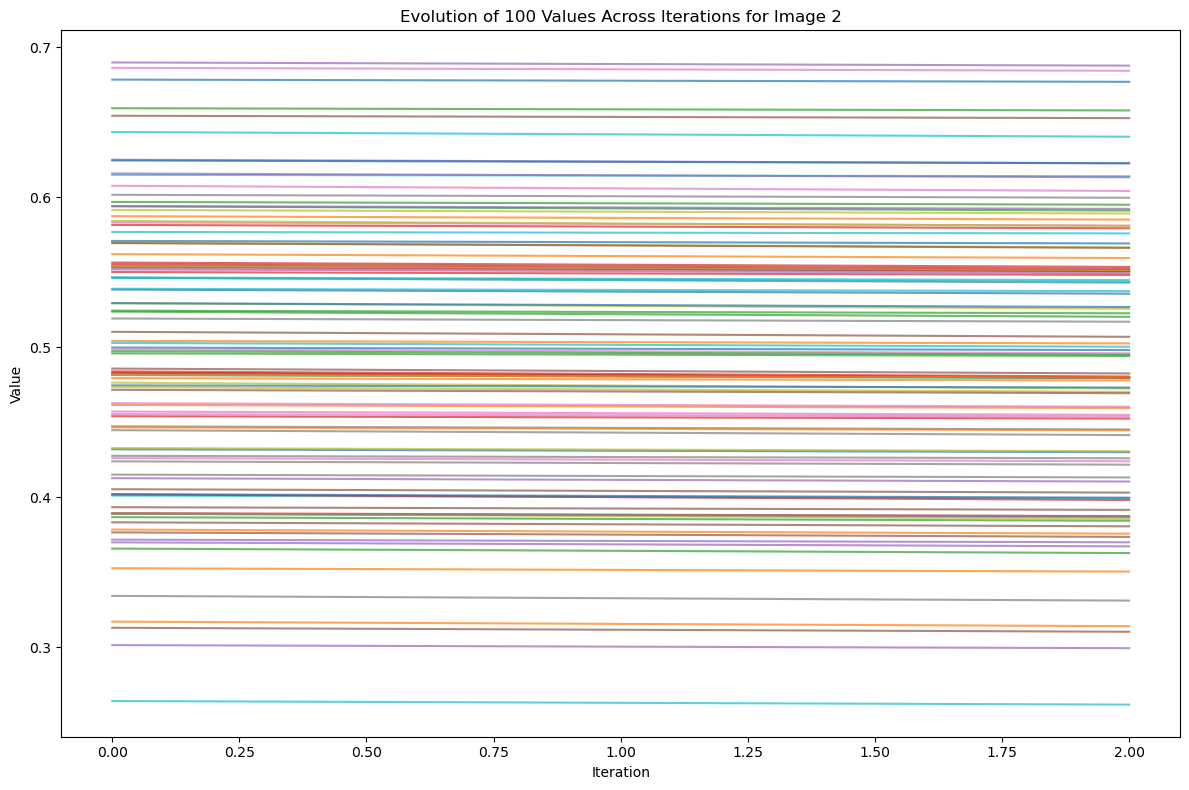

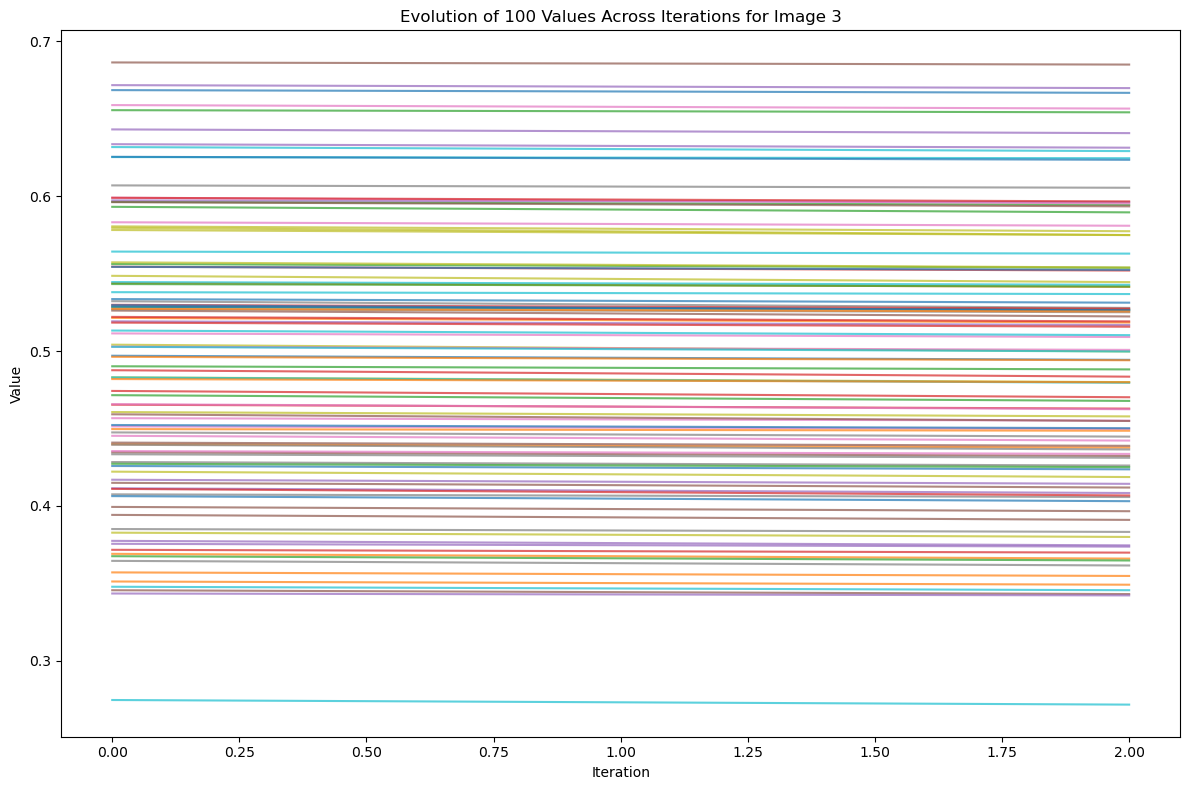

In [14]:
# Cell 2: Read .npy files, organize by image number, and plot

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Directory containing the .npy files
# npy_dir = "../logs/config_75d707d8_6"
npy_dir = '../logs/config_50219ab9'

# Retrieve all .npy files
npy_files = sorted(glob.glob(os.path.join(npy_dir, "*.npy")))

# Organize files by image number
image_dict = defaultdict(list)
for file_path in npy_files:
    filename = os.path.basename(file_path)
    try:
        image_num, iteration = map(int, filename.replace('.npy', '').split('.'))
        image_dict[image_num].append((iteration, file_path))
    except ValueError:
        print(f"Filename {filename} does not match the expected format and will be skipped.")

# Plotting
for image_num, iterations_files in sorted(image_dict.items()):
    # Sort the files by iteration
    sorted_files = sorted(iterations_files, key=lambda x: x[0])
    data_list = []
    iterations = []
    
    for iter_num, file_path in sorted_files:
        data = np.load(file_path)
        data_list.append(data)
        iterations.append(iter_num)
    
    # Convert list to numpy array for easier slicing
    data_array = np.array(data_list)  # Shape: (num_iterations, 100)
    
    plt.figure(figsize=(12, 8))
    
    for col_idx in range(data_array.shape[1]):
        plt.plot(iterations, data_array[:, col_idx], alpha=0.7)
        
    plt.title(f"Evolution of 100 Values Across Iterations for Image {image_num}")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    # plt.legend([f"Value {i+1}" for i in range(data_array.shape[1])], loc="upper right", ncol=2, fontsize="x-small")
    plt.tight_layout()
    plt.show()



Image 1 Analysis:
Elements that decreased: 100 out of 100
Details of decreases:
Element 0: Decreased by 0.0021 (from 0.4850 to 0.4830)
Element 1: Decreased by 0.0024 (from 0.5516 to 0.5492)
Element 2: Decreased by 0.0014 (from 0.5251 to 0.5237)
Element 3: Decreased by 0.0020 (from 0.3720 to 0.3700)
Element 4: Decreased by 0.0023 (from 0.5037 to 0.5014)
Element 5: Decreased by 0.0025 (from 0.4224 to 0.4199)
Element 6: Decreased by 0.0025 (from 0.4992 to 0.4966)
Element 7: Decreased by 0.0022 (from 0.4926 to 0.4905)
Element 8: Decreased by 0.0041 (from 0.5132 to 0.5091)
Element 9: Decreased by 0.0007 (from 0.5627 to 0.5620)
Element 10: Decreased by 0.0015 (from 0.4607 to 0.4593)
Element 11: Decreased by 0.0016 (from 0.4686 to 0.4670)
Element 12: Decreased by 0.0012 (from 0.5387 to 0.5375)
Element 13: Decreased by 0.0017 (from 0.5817 to 0.5800)
Element 14: Decreased by 0.0021 (from 0.6131 to 0.6110)
Element 15: Decreased by 0.0023 (from 0.3331 to 0.3307)
Element 16: Decreased by 0.0021 (

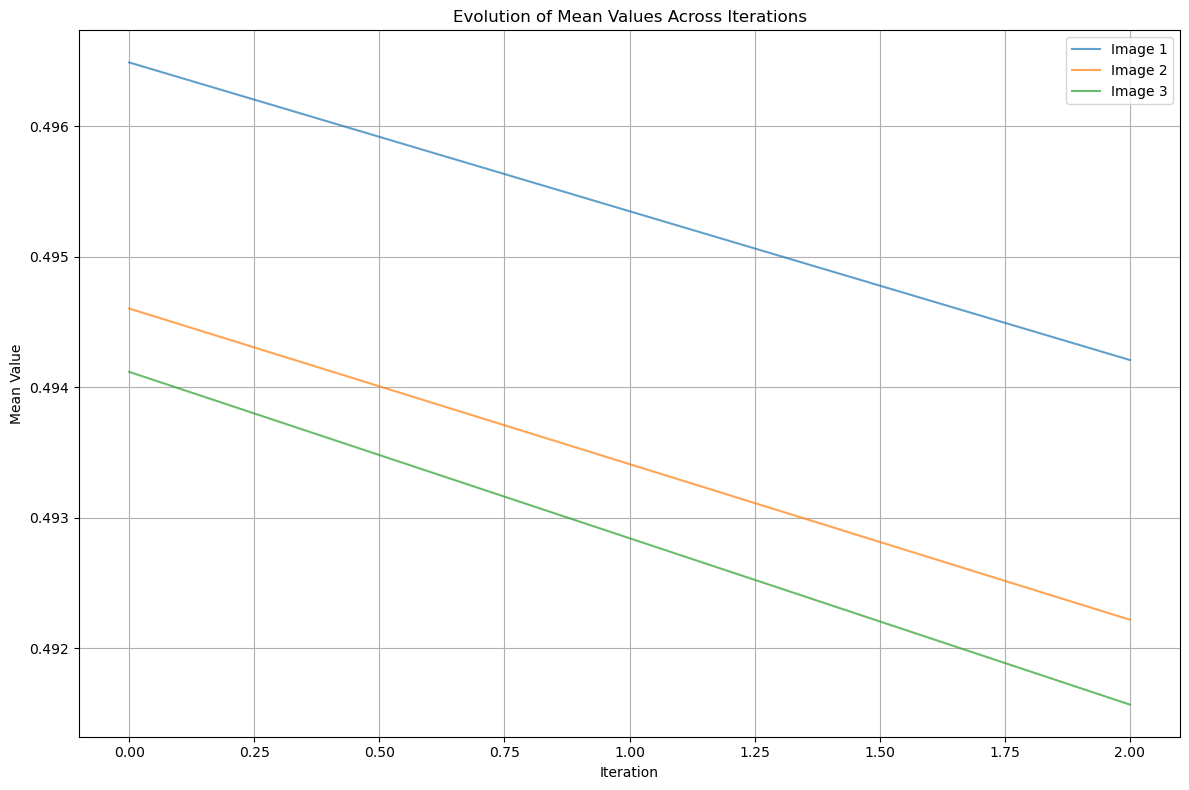

In [16]:
# Cell 2: Read .npy files and analyze value changes

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Directory containing the .npy files
npy_dir = "../logs/config_50219ab9"

# Retrieve all .npy files
npy_files = sorted(glob.glob(os.path.join(npy_dir, "*.npy")))

# Organize files by image number
image_dict = defaultdict(list)
for file_path in npy_files:
    filename = os.path.basename(file_path)
    try:
        image_num, iteration = map(int, filename.replace('.npy', '').split('.'))
        image_dict[image_num].append((iteration, file_path))
    except ValueError:
        print(f"Filename {filename} does not match the expected format and will be skipped.")

# Create a single plot for all images
plt.figure(figsize=(12, 8))

# Analyze and plot changes for each image
for image_num, iterations_files in sorted(image_dict.items()):
    sorted_files = sorted(iterations_files, key=lambda x: x[0])
    means = []
    iterations = []
    
    # Get first and last data points
    first_iter, first_file = sorted_files[0]
    last_iter, last_file = sorted_files[-1]
    
    first_data = np.load(first_file)
    last_data = np.load(last_file)
    
    # Find elements that decreased
    decreases = first_data - last_data
    decreased_indices = np.where(decreases > 0)[0]
    
    if len(decreased_indices) > 0:
        print(f"\nImage {image_num} Analysis:")
        print(f"Elements that decreased: {len(decreased_indices)} out of {len(first_data)}")
        print("Details of decreases:")
        for idx in decreased_indices:
            decrease_amount = decreases[idx]
            print(f"Element {idx}: Decreased by {decrease_amount:.4f} (from {first_data[idx]:.4f} to {last_data[idx]:.4f})")
    
    else:
        print(f'No elements decreased in image {image_num}.')
    
    # Plot mean evolution
    for iter_num, file_path in sorted_files:
        data = np.load(file_path)
        means.append(np.mean(data))
        iterations.append(iter_num)
    
    plt.plot(iterations, means, label=f'Image {image_num}', alpha=0.7)

plt.title("Evolution of Mean Values Across Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
